In [1]:
import pandas as pd
import regex as re
import string 
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [2]:
# preprocessing functions
# preprocessing
stop_words = stopwords.words('english')

#add punctuation char's to stopwords list
stop_words += list(string.punctuation) # <-- contains !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
#add integers
stop_words += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '’', 'amp', "'", '``', "''", '“' , '”', '...', "'s", "n't", 'covid19', 'coronavirus']

def remove_urls(dataframe):
#replace URL of a text
    dataframe['text'] = dataframe['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', regex=True)

# tokenize
# remove stop words, puncutation, lower()
def tokenize_lowercase(text):
    tokens = nltk.word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    return stopwords_removed


# lemmatize text
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]



In [3]:
df = pd.read_csv('dataset-with-toxicity.csv') 
# df = df[:1000]

remove_urls(df)
df['text'] = df['text'].apply(tokenize_lowercase)
df['text'] = df['text'].apply(lemmatize_text)

In [5]:
from nltk.probability import FreqDist

#iterate through each tweet, then each token in each tweet, and store in one list
flat_words = [item for sublist in df['text'] for item in sublist]

word_freq = FreqDist(flat_words)

word_freq.most_common(30)

[('people', 2504),
 ('case', 2184),
 ('realdonaldtrump', 2120),
 ('u', 2024),
 ('pandemic', 1974),
 ('death', 1947),
 ('new', 1934),
 ('health', 1789),
 ('need', 1542),
 ('covid_19', 1521),
 ('today', 1505),
 ('state', 1502),
 ('country', 1426),
 ('trump', 1376),
 ('time', 1365),
 ('one', 1290),
 ('fight', 1288),
 ('help', 1287),
 ('day', 1253),
 ('say', 1243),
 ('response', 1158),
 ('patient', 1143),
 ('support', 1107),
 ('world', 1102),
 ('china', 1050),
 ('home', 1044),
 ('worker', 1043),
 ('via', 1025),
 ('get', 1001),
 ('crisis', 995)]

In [6]:

#retrieve word and count from FreqDist tuples

most_common_count = [x[1] for x in word_freq.most_common(30)]
most_common_word = [x[0] for x in word_freq.most_common(30)]

#create dictionary mapping of word count
top_30_dictionary = dict(zip(most_common_word, most_common_count))

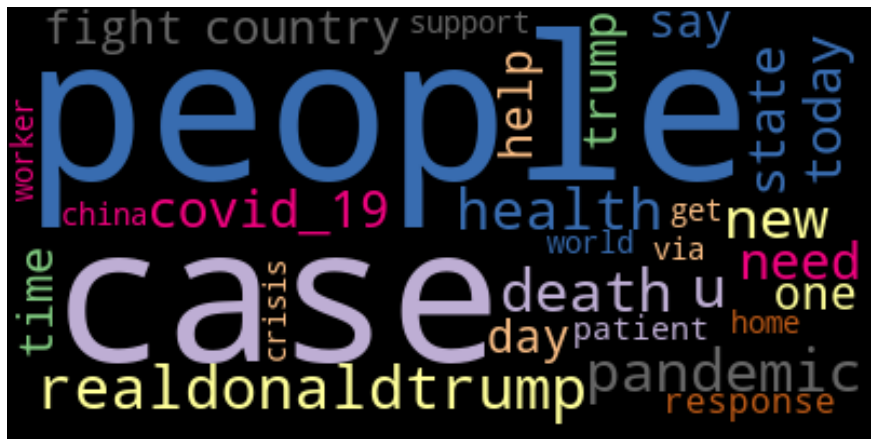

In [7]:
from wordcloud import WordCloud

#Create Word Cloud of top 30 words
wordcloud = WordCloud(colormap = 'Accent', background_color = 'black').generate_from_frequencies(top_30_dictionary)

#plot with matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('top_30_cloud.png')
plt.show()

In [8]:

from gensim.corpora import Dictionary

text_dict = Dictionary(df.text)


In [9]:
tweets_bow = [text_dict.doc2bow(tweet) for tweet in df['text']]

In [ ]:
from gensim.models.ldamodel import LdaModel

k = 5
tweets_lda = LdaModel(tweets_bow,
                      num_topics = k,
                      id2word = text_dict,
                      random_state = 1,
                      passes=10)

tweets_lda.show_topics()

In [ ]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(tweets_lda, tweets_bow, dictionary=tweets_lda.id2word)
vis